In [3]:
!pip install pandas
!pip install numpy
!pip install pingouin
!pip install matplotlib
!pip install seaborn
!pip install scipy

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pingouin as pg
from scipy.stats import shapiro
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Set the significance level
alpha = 0.10

In [10]:
men_df = pd.read_csv("men_results.csv")
women_df = pd.read_csv("women_results.csv")

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [11]:
men_df.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [12]:
women_df.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [20]:
print(women_df.shape)
print(men_df.shape)

(4884, 7)
(44353, 7)


In [22]:
# Now we create a new column for Goals being scored by both men and women

men_df['goals_scored'] = men_df['home_score'] + men_df['away_score']
women_df['goals_scored'] = women_df['home_score'] + women_df['away_score']

In [26]:
print(men_df['goals_scored'])     
print(women_df['goals_scored'])   

0        0
1        6
2        3
3        4
4        3
        ..
44348    1
44349    1
44350    3
44351    4
44352    6
Name: goals_scored, Length: 44353, dtype: int64
0       1
1       7
2       2
3       4
4       5
       ..
4879    1
4880    1
4881    4
4882    3
4883    3
Name: goals_scored, Length: 4884, dtype: int64


# Now determining if the data is normally distributed
    1. The normal distribution is a symmetric bell-shaped curve, with the distribution centered around the mean.
    2. Plotting a histogram with a kde plot will clearly show the curve.
    3. If the normality is unclear from the plot, we can perform Shapiro-Wilk test.    

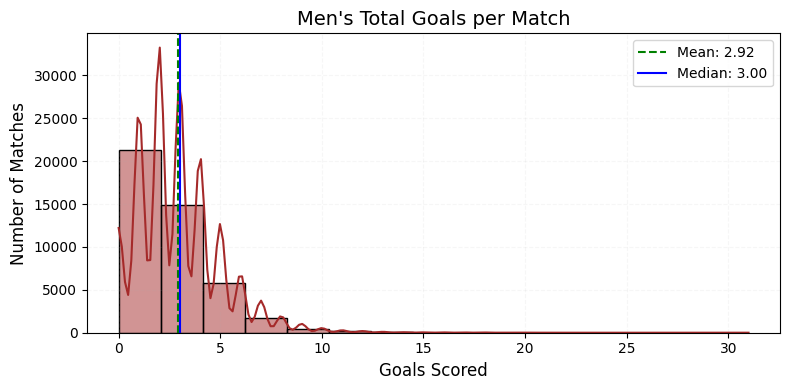

In [44]:
# Men's plot

mean = men_df['goals_scored'].mean()
median = men_df['goals_scored'].median()
plt.figure(figsize=(8, 4))
sns.histplot(men_df['goals_scored'], kde=True, bins=15, color='brown', edgecolor='black')
plt.axvline(mean, color='green', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='blue', linestyle='-', label=f'Median: {median:.2f}')
plt.title("Men's Total Goals per Match", fontsize=14)
plt.xlabel("Goals Scored", fontsize=12)
plt.ylabel("Number of Matches", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.1)
plt.tight_layout()
plt.show()

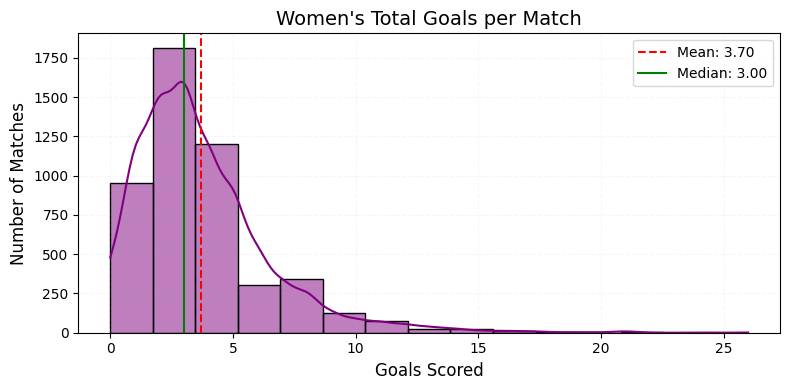

In [45]:
# Women's plot

mean = women_df['goals_scored'].mean()
median = women_df['goals_scored'].median()
plt.figure(figsize=(8, 4))
sns.histplot(women_df['goals_scored'], kde=True, bins=15, color='purple', edgecolor='black')
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
plt.title("Women's Total Goals per Match", fontsize=14)
plt.xlabel("Goals Scored", fontsize=12)
plt.ylabel("Number of Matches", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.1)
plt.tight_layout()
plt.show()

# Shapiro-Wilk Test Hypotheses :
For both men’s and women’s goals, the hypotheses are:

1. Null Hypothesis (H₀): The data comes from a normal distribution.

2. Alternative Hypothesis (H₁): The data does not come from a normal distribution.

In [47]:
# Checking for Normality by Shapiro-Wilk test

m_goal = men_df['goals_scored']
w_goal = women_df['goals_scored']

m_stat, m_pvalue = shapiro(m_goal)
w_stat, w_pvalue = shapiro(w_goal)

print("Shapiro-Wilk test statistic for men: ", m_stat)
print("p-value for men: ", round(m_pvalue, 2))
print("Shapiro-Wilk test statistic for women: ", w_stat)
print("p-value for wommen: ", round(w_pvalue, 2))

Shapiro-Wilk test statistic for men:  0.8972436900357965
p-value for men:  0.0
Shapiro-Wilk test statistic for women:  0.861581958610495
p-value for wommen:  0.0


Conclusion:

1. Since both p-values are less than 0.05, we reject the null hypothesis for both datasets.

2. This means that the goals scored in both men's and women's matches do not follow a normal distribution.

# Checking Variance Equality

I should compare the variances of the two datasets. For doing this, I use the Levene's test. 
If the variances are not equal, I need to use a modified t-test, such as the Welch's t-test, which does not assume equal variances.

 1. Null : The variances of the women's goals and men's are not significantly different.
 2. Alternate : The variances of the women's goals and men's are significantly different.

In [51]:
from scipy.stats import levene

m_goals = men_df['goals_scored']
w_goals = women_df['goals_scored']

stat, p_value = levene(m_goals, w_goals)

print(f"Levene’s test statistic: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.10
if p_value > alpha:
    print(" Fail to reject H₀: The variances are not significantly different.")
else:
    print(" Reject H₀: The variances are significantly different.")


Levene’s test statistic: 309.7258
p-value: 0.0000
 Reject H₀: The variances are significantly different.


# Test 1

We’re testing:

1. H₀ (Null Hypothesis): μ ≤ 2.5 (The mean of scored goal of men's matches is equal or less than 2.5)

2. H₁ (Alternative Hypothesis): μ > 2.5 (The mean of scored goal of men's matches is greater than 2.5)

#### Conditions :

1. One sample 

2. Large sample size (Central Limit Theorem applies)

3. Population variance unknown → Use sample standard deviation

4. Right-tailed test 

So, with this condition, I use Z-Statistic.

#### Z-Test Formula for One Sample:

    Z = (x̄ - μ) / (s / √n)
    
    x̄ = sample mean

    μ = hypothesized population mean

    s = sample standard deviation

    n = sample size

In [52]:
# Why this test?

# We want to check if the average number of goals scored in men's matches 
# is significantly greater than 2.5. Since we have a large sample and 
# don't know the population variance, we use a one-sample Z-test.

from scipy.stats import norm

mu = 2.5
sample_mean = m_goals.mean()
sample_std = m_goals.std()
n = len(m_goals)

z_stat = (sample_mean - mu) / (sample_std / np.sqrt(n))

# Since we're testing if the mean is greater than 2.5 (right-tailed),
# we subtract the cumulative probability from 1

p_value = 1 - norm.cdf(z_stat)

print(f"Sample Mean: {sample_mean:.4f}")
print(f"Z-statistic: {z_stat:.4f}")
print(f"One-tailed p-value: {p_value:.4f}")

alpha = 0.10  

if p_value < alpha:
    print(" Reject H₀: The average number of goals in men's matches is significantly greater than 2.5.")
else:
    print(" Fail to reject H₀: No significant evidence that men's matches average more than 2.5 goals.")

Sample Mean: 2.9194
Z-statistic: 42.4462
One-tailed p-value: 0.0000
 Reject H₀: The average number of goals in men's matches is significantly greater than 2.5.


# Test 2

We’re testing:

1. H₀ (Null Hypothesis): μ_men − μ_women ≥ 0.75
   (The average number of goals in men's matches is greater than or equal to that in women's matches by at least 0.75)

2. H₁ (Alternative Hypothesis): μ_men − μ_women < 0.75
   (The difference in average goals between men’s and women’s matches is less than 0.75)

#### Conditions:
     1. Two independent samples (Men’s and Women’s matches)

     2. Large sample size for both groups (CLT applies)

     3. Population variances unknown

     4. Left-tailed test

     5. Unequal variances assumed → Use Welch’s T-test

#### Formula for T test :
     
     T = ((x̄₁ − x̄₂) − δ) / √(s₁² / n₁ + s₂² / n₂)
Where:

x̄₁ = sample mean of men's goals

x̄₂ = sample mean of women's goals

s₁, s₂ = sample standard deviations

n₁, n₂ = sample sizes

δ = hypothesized difference (e.g., 0.75)

In [55]:
from scipy.stats import ttest_ind

m_goals = men_df['goals_scored']
w_goals = women_df['goals_scored']

mean_diff = m_goals.mean() - w_goals.mean()
print(f"Observed difference in means (Men - Women): {mean_diff:.4f}")

# We're testing if (mean_men - mean_women) < 0.75
# So we shift the women's goals upward by 0.75 to test if mean_men < mean_women + 0.75
adjusted_women_goals = w_goals + 0.75

# We use equal_var = False because population variances are unknown and assumed unequal
# Since it's a left-tailed test, use alternative='less'
t_stat, p_value = ttest_ind(m_goals, adjusted_women_goals, equal_var=False, alternative='less')

print(f"T-statistic: {t_stat:.4f}")
print(f"One-tailed p-value: {p_value:.4f}")

alpha = 0.10  
if p_value < alpha:
    print(" Reject H₀: The average goal difference is significantly less than 0.75.")
else:
    print(" Fail to reject H₀: No significant evidence that the difference is less than 0.75.")

Observed difference in means (Men - Women): -0.7848
T-statistic: -37.3121
One-tailed p-value: 0.0000
 Reject H₀: The average goal difference is significantly less than 0.75.


# Test 3

We're testing:

    1. H₀ (Null Hypothesis):The mean number of goals in FIFA World Cup matches is greater than or equal to that in other tournaments.
       (μ_FIFA ≥ μ_other)

    2. H₁ (Alternative Hypothesis): The mean number of goals in FIFA World Cup matches is less than in other tournaments.
       (μ_FIFA < μ_other)

We use Anova testing for 2 groups.

In [57]:
# Filter FIFA matches from women's data
women_fifa_df = women_df[women_df['tournament'].str.contains('FIFA', case=False, na=False)]

# Filter FIFA matches from men's data
men_fifa_df = men_df[men_df['tournament'].str.contains('FIFA', case=False, na=False)]

# Check how many rows each has
print("Women's FIFA matches:", women_fifa_df.shape[0])
print("Men's FIFA matches:", men_fifa_df.shape[0])


Women's FIFA matches: 456
Men's FIFA matches: 8843


In [60]:
# First we should seperate FIFA matches and other tournament

list = []

for i in range (0, men_df.shape[0]):
    if men_df.iloc[i]['tournament'] == 'FIFA World Cup':
        list.append('Yes')
    else:
        list.append('No')

# Created a new FIFA column
men_df['FIFA'] = list

# Created 2 different dataframe
FIFA_table = men_df[men_df['FIFA'] == 'Yes']
Other_table = men_df[men_df['FIFA'] == 'No']

print("FIFA World Cup matches:", FIFA_table.shape[0])
print("Other tournament matches:", Other_table.shape[0])

FIFA World Cup matches: 964
Other tournament matches: 43389


In [70]:
# Compute the mean
mean_fifa = FIFA_table['goals_scored'].mean()
mean_other = Other_table['goals_scored'].mean()

print(mean_fifa , mean_other)

2.8215767634854774 2.921523888543179


In [67]:
# Created a funcion for finding error standard deviation based on bootstrap

def find_error(df):
    all_means = []
    for i in range(5000):
        sample = df.sample(frac = 1, replace = True)
        mean = sample['goals_scored'].mean()
        all_means.append(mean)
    return np.std(all_means) 

se_f = find_error(FIFA_table)
se_o = find_error(Other_table)
print(f"Standard Error of FIFA table: {se_f}")
print(f"Standard Error of Other table: {se_o}")

Standard Error of FIFA table: 0.06247007080471112
Standard Error of Other table: 0.009892339427617565


In [71]:
# Now applying the t-score formula:

num = mean_fifa - mean_other
denom = np.sqrt(se_f ** 2 / FIFA_table.shape[0] + se_o ** 2 / Other_table.shape[0])

t_stat = num / denom

print(f"T-statistic: {t_stat:.4f}")

T-statistic: -50.3036


In [75]:
# Calculating degree of freedom

dof = FIFA_table.shape[0] - Other_table.shape[0] + 2

# Convert t-score to t-standard CDF to find p-value

from scipy.stats import t

#Left tailed
t.cdf(t_stat, df = dof)

print(f"Degrees of Freedom (Welch): {dof:.2f}")
print(f"One-tailed p-value: {p_value:.4f}")

# Interpret result
alpha = 0.10
if p_value < alpha:
    print(" Reject H₀: FIFA matches have significantly fewer goals than other tournaments.")
else:
    print(" Fail to reject H₀: No significant evidence that FIFA matches have fewer goals.")

Degrees of Freedom (Welch): -42423.00
One-tailed p-value: 0.0000
 Reject H₀: FIFA matches have significantly fewer goals than other tournaments.


# Conclusion

✅ Women’s international matches tend to score more goals than men’s.

✅ Men’s FIFA World Cup matches score fewer goals than other international tournaments.

✅ Statistical tests confirm that goal distributions are not normal, and using Welch’s t-tests with bootstrapping gives more robust conclusions.